# Analysis of the moodplay distances

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

Let's load the moodplay dataset first

In [2]:
path = "/home/gerardo/Downloads/DIgitalMedia/Specific Idea 2 Network Science and Music - Moodplay Dataset (Updated 10 April added graphs  generat/Moodplay graphs mood/graphs_mood/moodfeatures.csv"
moodplay_dataset = pd.read_csv(path, sep=",")
filter1 = np.array(["song","arousal","valence","dominance"])  
selected_data=moodplay_dataset.loc[:,filter1]
adna=selected_data.dropna(axis=1)
df = pd.DataFrame(adna)
print(df.head())
df.shape

                                  song   arousal   valence  dominance
0                  JudgeDread-BigSeven -0.746238 -0.262107  -0.302248
1        WillieWilliams-ArmagideonTime -0.885024 -0.435744   0.766729
2              KrisKristofferson-WhyMe -0.959188 -0.584947   0.932921
3           GramParsons-CryOneMoreTime -0.791149 -0.554706   0.370833
4  HankWilliams-MySweetLoveAin'tAround -0.887018 -0.207455  -0.167268


(389, 4)

Then let's load the communities csv from gephi

Note: You have to run the modularity statistic before exporting the table

(To export the CSV file from gephi go to Data Laboratory -> Export Table)

In [3]:
gephi_csv_path = "/home/gerardo/Downloads/DIgitalMedia/Project/ED-70.csv"
communities_dataset = pd.read_csv(gephi_csv_path, sep=",")
filter2 = np.array(["Id","modularity_class"])  
selected_data_gephi=communities_dataset.loc[:,filter2]
adna2=selected_data_gephi.dropna(axis=1)
gephi_df = pd.DataFrame(adna2)
gephi_df.columns = ['song','modularity_class']
gephi_df.head()

,song,modularity_class
0,JudgeDread-BigSeven,0
1,GramParsons-CryOneMoreTime,0
2,HankWilliams-MySweetLoveAin'tAround,0
3,TheKing'sSingers-Can'tBuyMeLove,0
4,CharlieRich-LifeHasItsLittleUpsAndDowns,0


Let's have a look at the column datatypes, the modularity class should be type 'int64'

In [4]:
gephi_df.dtypes

song                object
modularity_class     int64
dtype: object

Store each id in a different dataframe where the modularity class is the key

In [5]:
available_classes = list(gephi_df.modularity_class.unique())
available_classes.sort()

classes_dict = {}

for modularity_class in available_classes:
    class_name = str("class_{}".format(modularity_class))
    classes_dict[class_name] = gephi_df.loc[gephi_df['modularity_class'] == int(modularity_class)]
    print(classes_dict[class_name].head())
    print(classes_dict[class_name].shape)

                                      song  modularity_class
0                      JudgeDread-BigSeven                 0
1               GramParsons-CryOneMoreTime                 0
2      HankWilliams-MySweetLoveAin'tAround                 0
3          TheKing'sSingers-Can'tBuyMeLove                 0
4  CharlieRich-LifeHasItsLittleUpsAndDowns                 0
(95, 2)
                                          song  modularity_class
114  RichardHellAndTheVoidoids-BlankGeneration                 1
115            BigJoeTurner-ShakeRattleAndRoll                 1
116                       BruceChannel-HeyBaby                 1
117                      LittleMilton-BlindMan                 1
118         MelMcDaniel-LouisianaSaturdayNight                 1
(95, 2)
                                             song  modularity_class
95                              SacredSpirit-Dawa                 2
96                             TheBachelors-Diane                 2
97                      

Do an inner join to merge the tables, this way we get the arousal, valence and dominance values for the songs in one particular community

In [6]:
class_df_dict = {}

for class_number, values in classes_dict.items():
    class_df_dict[class_number] = pd.merge(df, values, on='song', how='inner')
    print(class_df_dict[class_number].head())
    print(class_df_dict[class_number].shape)


                                  song   arousal   valence  dominance  \
0                  JudgeDread-BigSeven -0.746238 -0.262107  -0.302248   
1        WillieWilliams-ArmagideonTime -0.885024 -0.435744   0.766729   
2              KrisKristofferson-WhyMe -0.959188 -0.584947   0.932921   
3           GramParsons-CryOneMoreTime -0.791149 -0.554706   0.370833   
4  HankWilliams-MySweetLoveAin'tAround -0.887018 -0.207455  -0.167268   

   modularity_class  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
(95, 5)
                                        song   arousal   valence  dominance  \
0  RichardHellAndTheVoidoids-BlankGeneration  0.908448  0.804734  -0.469309   
1            BigJoeTurner-ShakeRattleAndRoll  0.549761  0.800859  -0.155877   
2                            XTC-SeasonCycle  0.446985  1.282751   0.589200   
3                  TheHumanBeinz-NobodyButMe  0.645483  1.279896   0.517637   
4                       Br

Plot the different values for the communities

In [7]:
mpl.rcParams['figure.figsize'] = (20, 10)
mpl.rcParams['axes.grid'] = False 

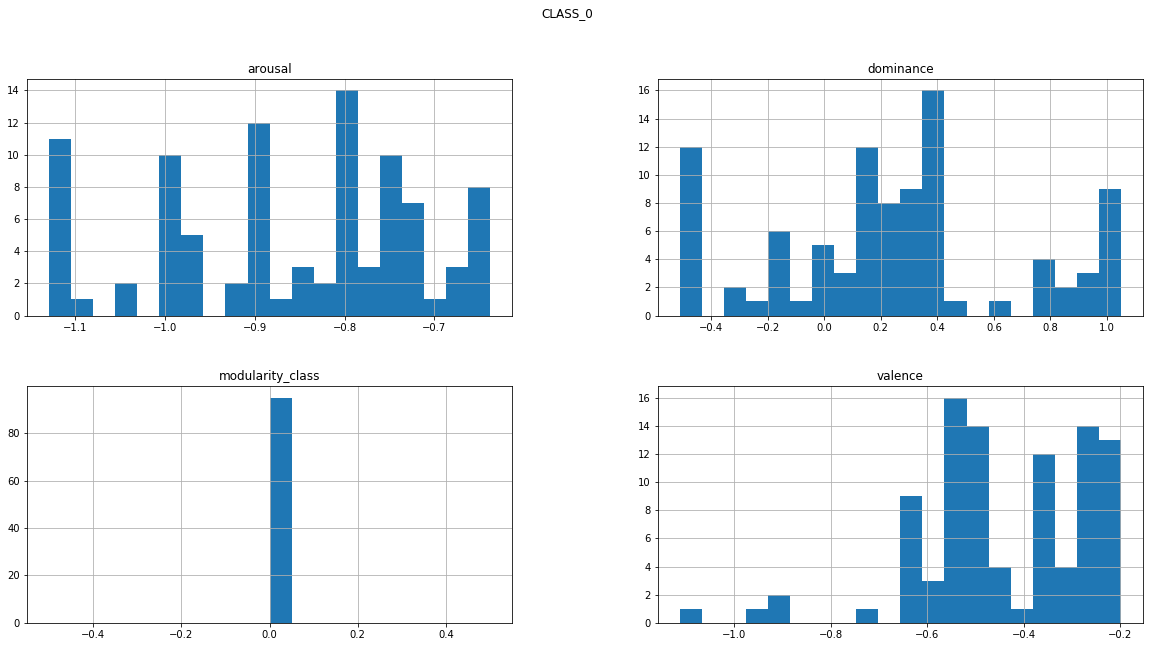

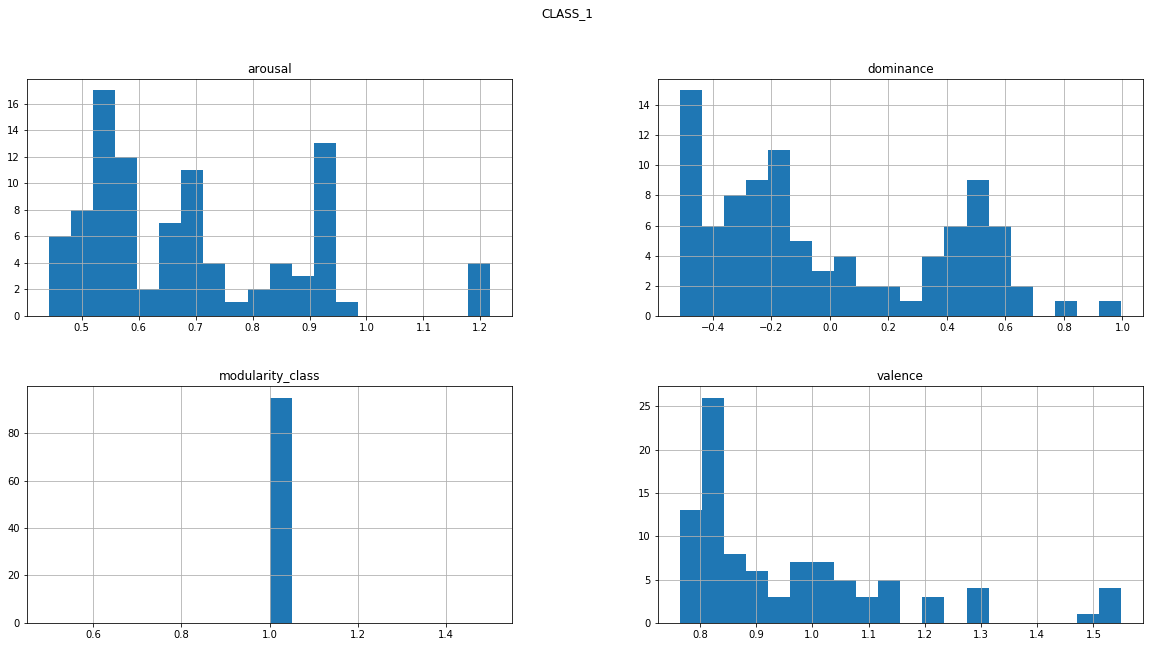

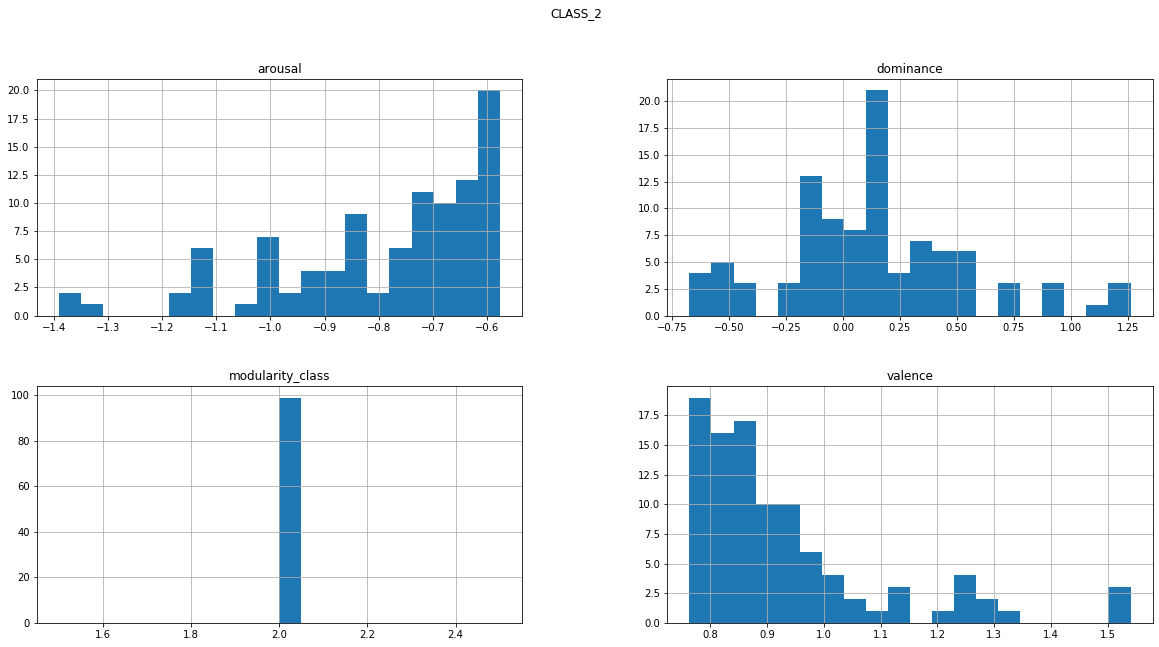

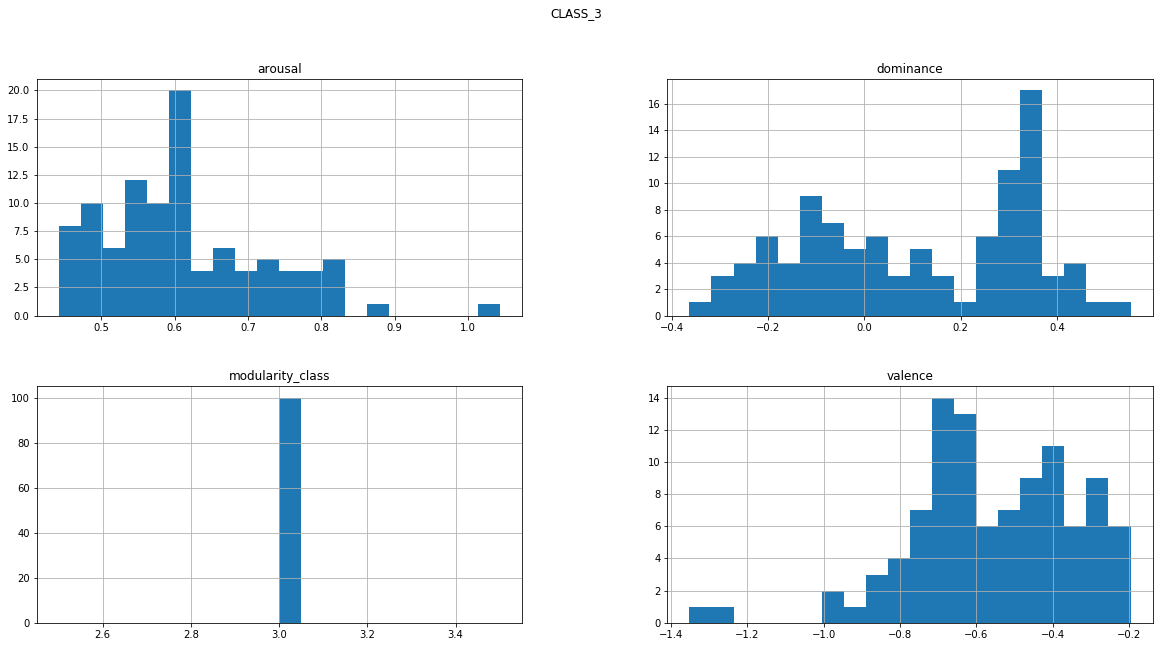

In [8]:
#Note: If the csv file contains many communities (+20) this will not work due to memory consumption
for key in class_df_dict.keys():
    hist_plot = class_df_dict[key].hist(bins=20, alpha=1)
    plt.suptitle("{}".format(str(key).upper()))
